In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [42]:
def add_layer(inputs, in_size, out_size, activation_function=None): #linear if act not defined
    W = tf.Variable(tf.random_normal([in_size, out_size]))
#     W = tf.Variable(tf.zeros([in_size, out_size]))
    b = tf.Variable(tf.zeros([1, out_size]))
#     b = tf.Variable(tf.random_normal([1, out_size]))
    
    Wx_plus_b = tf.matmul(inputs, W) + b
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [98]:
xs = tf.placeholder(tf.float32, [None, 784])    #shape=(100,784)
ys = tf.placeholder(tf.float32, [None, 10])    #shape=(100,10)
ys_ae = tf.placeholder(tf.float32, [None, 784])

# layer1 = add_layer(xs, 784, 100, activation_function=tf.nn.relu)
layer1 = add_layer(xs, 784, 100, activation_function=tf.nn.sigmoid)
# layer2 = add_layer(layer1, 100, 10, activation_function=tf.nn.relu)
layer2 = add_layer(layer1, 100, 100, activation_function=tf.nn.sigmoid)
# layer3 = add_layer(layer2, 10, 100, activation_function=tf.nn.softmax)
layer3 = add_layer(layer2, 100, 10, activation_function=tf.nn.softmax)
# layer3 = add_layer(layer2, 10, 100, activation_function=tf.nn.relu)
# layer3 = add_layer(layer2, 10, 100, activation_function=tf.nn.sigmoid)
# layer4 = add_layer(layer3, 100, 784, activation_function=tf.nn.relu)
layer4 = add_layer(layer2, 100, 784, activation_function=tf.nn.sigmoid)
# prediction = add_layer(layer4, 2, 10, activation_function=tf.nn.softmax)

# loss_ae = tf.reduce_mean(tf.square(layer4-xs))
loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer4))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys, logits=layer2))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys, logits=prediction))

# train_step_ae = tf.train.GradientDescentOptimizer(0.5).minimize(loss_ae)
train_step_ae = tf.train.RMSPropOptimizer(0.05).minimize(loss_ae)
# train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
# train_step = tf.train.RMSPropOptimizer(0.01).minimize(loss)
# train_step = tf.train.MomentumOptimizer(0.2,0.1).minimize(loss)

# correct_prediction = tf.equal(tf.argmax(layer3,1), tf.argmax(ys,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [99]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_size = 100
batches = x_train.shape[0]//batch_size
index = np.arange(x_train.shape[0])

#Autoencoder
for epoch in range(101):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    

epoch:  0  , loss:  0.631339
epoch:  5  , loss:  0.620112
epoch:  10  , loss:  0.617951
epoch:  15  , loss:  0.617276
epoch:  20  , loss:  0.616732
epoch:  25  , loss:  0.616244
epoch:  30  , loss:  0.616039
epoch:  35  , loss:  0.61596
epoch:  40  , loss:  0.616116
epoch:  45  , loss:  0.615549
epoch:  50  , loss:  0.615478
epoch:  55  , loss:  0.615421
epoch:  60  , loss:  0.615191
epoch:  65  , loss:  0.615376
epoch:  70  , loss:  0.615059
epoch:  75  , loss:  0.615145
epoch:  80  , loss:  0.61486
epoch:  85  , loss:  0.614788
epoch:  90  , loss:  0.614824
epoch:  95  , loss:  0.614633
epoch:  100  , loss:  0.614544


[[  8.65161498e-10   6.84974966e-10   8.13979710e-08 ...,   2.02281920e-12
    2.85872315e-11   8.12066858e-10]
 [  2.87066655e-08   3.56140326e-08   9.11191549e-08 ...,   8.01209943e-09
    1.55252700e-08   4.52678250e-07]
 [  2.04492923e-10   2.99976433e-11   1.94768108e-11 ...,   5.05267383e-10
    4.15936424e-10   3.33060607e-10]
 [  1.76018911e-09   4.61552758e-12   3.35442396e-10 ...,   1.69350256e-10
    7.49869527e-14   2.91451308e-10]]


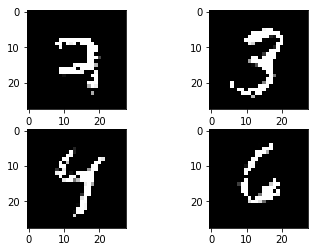

In [100]:
# print sess.run(layer4, feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer4, feed_dict={xs:x_train})])
print sess.run(layer4, feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

In [110]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys, logits=layer3))

train_step = tf.train.GradientDescentOptimizer(0.7).minimize(loss)
# train_step = tf.train.RMSPropOptimizer(0.01).minimize(loss)
# train_step = tf.train.MomentumOptimizer(0.2,0.1).minimize(loss)

correct_prediction = tf.equal(tf.argmax(layer3,1), tf.argmax(ys,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

batch_size = 200
batches = x_train.shape[0]//batch_size
index = np.arange(x_train.shape[0])

for epoch in range(101):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]], ys: y_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss, feed_dict={xs: x_train, ys: y_train}),"accuracy: ",sess.run(accuracy, feed_dict={xs: x_train, ys: y_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
        print sess.run(tf.argmax(sess.run(layer3, feed_dict={xs: x_train})[0:50],1))

epoch:  0  , loss:  1.76746 accuracy:  0.683727
[7 3 4 5 4 0 2 0 9 9 0 3 7 2 7 0 2 9 0 0 3 0 7 3 9 7 4 5 5 9 5 3 4 4 2 7 3
 5 4 2 5 3 3 3 9 9 4 4 0 7]
epoch:  5  , loss:  1.76741 accuracy:  0.683727
[7 3 4 5 4 0 2 0 9 9 0 3 7 2 7 0 2 9 0 0 3 0 7 3 9 7 4 5 5 9 5 3 4 4 2 7 3
 5 4 2 5 3 3 3 9 9 4 4 0 7]
epoch:  10  , loss:  1.76737 accuracy:  0.683764
[7 3 4 5 4 0 2 0 9 9 0 3 7 2 7 0 2 9 0 0 3 0 7 3 9 7 4 5 5 9 5 3 4 4 2 7 3
 5 4 2 5 3 3 3 9 9 4 4 0 7]
epoch:  15  , loss:  1.76733 accuracy:  0.683764
[7 3 4 5 4 0 2 0 9 9 0 3 7 2 7 0 2 9 0 0 3 0 7 3 9 7 4 5 5 9 5 3 4 4 2 7 3
 5 4 2 5 3 3 3 9 9 4 4 0 7]
epoch:  20  , loss:  1.76728 accuracy:  0.683818
[7 3 4 5 4 0 2 0 9 9 0 3 7 2 7 0 2 9 0 0 3 0 7 3 9 7 4 5 5 9 5 3 4 4 2 7 3
 5 4 2 5 3 3 3 9 9 4 4 0 7]
epoch:  25  , loss:  1.76724 accuracy:  0.683855
[7 3 4 5 4 0 2 0 9 9 0 3 7 2 7 0 2 9 0 0 3 0 7 3 9 7 4 5 5 9 5 3 4 4 2 7 3
 5 4 2 5 3 3 3 9 9 4 4 0 7]
epoch:  30  , loss:  1.7672 accuracy:  0.683873
[7 3 4 5 4 0 2 0 9 9 0 3 7 2 7 0 2 9 0 0 3

[[  2.16716423e-09   4.07739037e-10   3.44509353e-05 ...,   6.92126842e-11
    2.27929592e-10   6.95657265e-09]
 [  1.69313589e-05   1.25639940e-06   2.94687179e-05 ...,   1.29422006e-06
    6.68180711e-09   2.38917960e-06]
 [  2.46643204e-08   1.12923101e-10   2.23134045e-08 ...,   9.13228689e-07
    1.63739733e-09   3.53165355e-08]
 [  2.24298574e-07   7.64708349e-12   2.36078336e-07 ...,   1.12339746e-08
    8.97443439e-11   5.19076366e-07]]


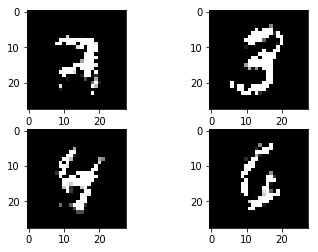

In [106]:
x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer4, feed_dict={xs:x_train})])
print sess.run(layer4, feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

[[  5.39178568e-09   4.80565976e-10   6.94733899e-05 ...,   3.46302292e-11
    2.32158348e-10   4.90721730e-09]
 [  3.83409060e-05   3.42109047e-07   3.07635055e-05 ...,   3.86735655e-06
    3.38634436e-08   1.66711561e-05]
 [  3.97470004e-08   2.16407364e-10   1.25004149e-08 ...,   4.28886278e-06
    3.13614712e-09   5.86460871e-08]
 [  2.42742090e-07   4.04406673e-12   1.50194978e-07 ...,   3.34051964e-09
    1.26009911e-10   3.79541035e-07]]


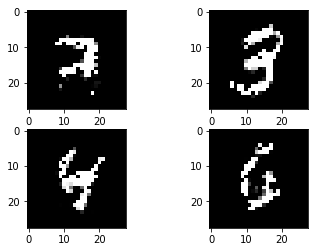

In [108]:
x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer4, feed_dict={xs:x_train})])
print sess.run(layer4, feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

In [70]:
def  extendList (val, list=[]) :  
    list.append(val)  
    return list  
  
list1 = extendList( 10 )  
list2 = extendList( 123 ,[])  
list3 = extendList( 'a' )  

In [80]:
print list1,list2,list3

[10, 'a', 123, 123, 123] [123] [10, 'a', 123, 123, 123]


In [112]:
print sess.run(layer2)

InvalidArgumentError: Shape [-1,784] has negative dimensions
	 [[Node: Placeholder_48 = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'Placeholder_48', defined at:
  File "/Users/htlin/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/htlin/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-98-cdf93f1d1688>", line 1, in <module>
    xs = tf.placeholder(tf.float32, [None, 784])    #shape=(100,784)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/htlin/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,784] has negative dimensions
	 [[Node: Placeholder_48 = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [115]:
np.arange(6)


array([0, 1, 2, 3, 4, 5])